In [8]:
import matplotlib.pyplot as plt
import networkx as nx

In [9]:

# Updated function to draw the bipartite graph with correctly formatted edge labels
def draw_bipartite_graph(graph, source, sink, flow_dict, title):
    # Define positions for a clear bipartite layout
    pos = {
        source: (0, 0), sink: (3, 0),
        'a1': (1, 3), 'a2': (1, 2), 'a3': (1, 1), 'a4': (1, 0),
        'b1': (2, 3), 'b2': (2, 2), 'b3': (2, 1), 'b4': (2, 0)
    }
    
    # Draw the graph
    plt.figure(figsize=(8, 5))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=1500, 
            font_size=10, font_weight='bold', edge_color='gray', arrows=True)
    
    # Prepare edge labels in the correct format
    edge_labels = {}
    for u in flow_dict:
        for v in flow_dict[u]:
            if (u, v) in graph.edges:
                edge_labels[(u, v)] = f"{flow_dict[u][v]}/{graph[u][v]['capacity']}"
    
    # Highlight the edges used in the flow solution
    flow_edges = [(u, v) for (u, v), label in edge_labels.items() if int(label.split('/')[0]) > 0]
    nx.draw_networkx_edges(graph, pos, edgelist=flow_edges, width=2.5, edge_color='blue')
    
    # Draw edge labels for flow/capacity
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='black', font_size=9)
    

    plt.axis('off')
    plt.tight_layout()
    plt.savefig(title + '.jpg')
    plt.show()


C:\Users\taha_kms\AppData\Local\Temp\ipykernel_19192\251535133.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


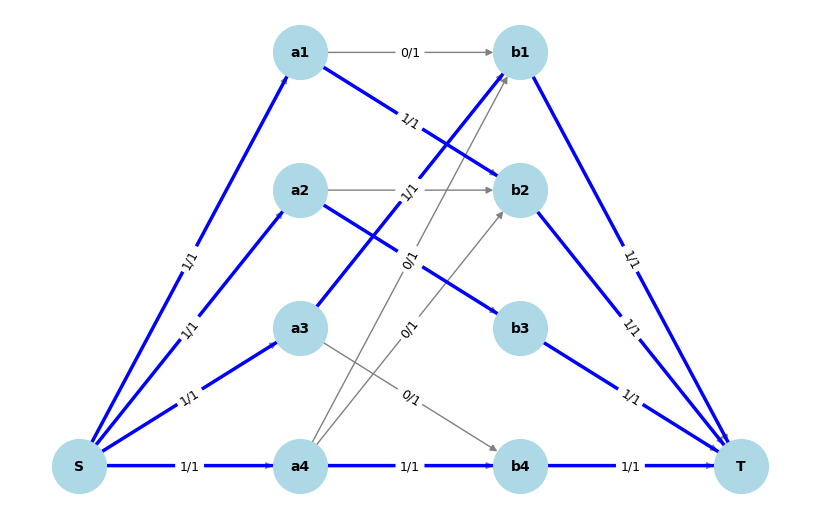

In [10]:

# Part (a): Perfect Matching Setup

G = nx.DiGraph()

# Add nodes for source, people, foods, and sink
people = ['a1', 'a2', 'a3', 'a4']
foods = ['b1', 'b2', 'b3', 'b4']
source, sink = 'S', 'T'

# Add edges from source to people
for person in people:
    G.add_edge(source, person, capacity=1)

# Preferences for each person
preferences = {
    'a1': ['b1', 'b2'],
    'a2': ['b2', 'b3'],
    'a3': ['b1', 'b4'],
    'a4': ['b1', 'b2', 'b4']
}

# Add edges based on preferences
for person, prefs in preferences.items():
    for food in prefs:
        G.add_edge(person, food, capacity=1)

# Add edges from foods to sink with capacity 1
for food in foods:
    G.add_edge(food, sink, capacity=1)

# Compute flow
flow_a, flow_dict_a = nx.maximum_flow(G, source, sink)
edge_labels_a = {(u, v): f"{flow_dict_a.get(u, {}).get(v, 0)}/{cap['capacity']}" 
                    for u, v, cap in G.edges(data=True)}

# Visualize part (a)
draw_bipartite_graph(G, source, sink, flow_dict_a, "Part_(a)_Perfect_Matching")


C:\Users\taha_kms\AppData\Local\Temp\ipykernel_19192\251535133.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


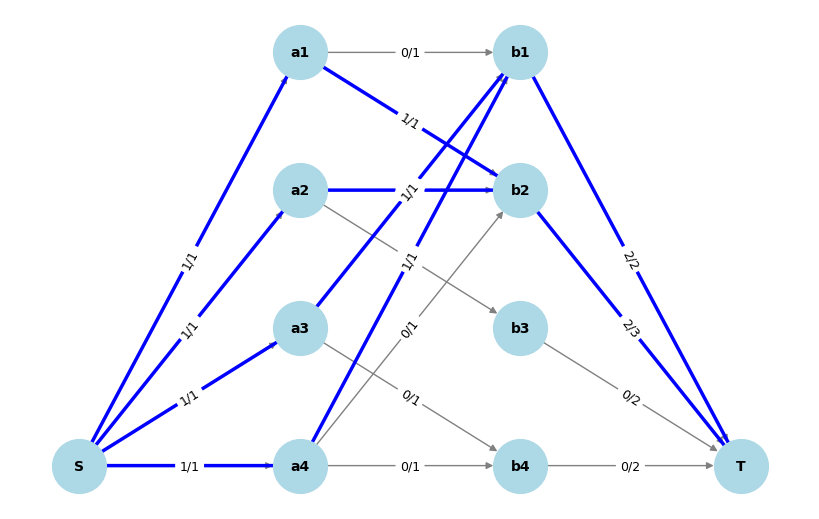

In [11]:

# Part (b): Multiple Portions of Food Setup

# Food capacities
food_capacities = {'b1': 2, 'b2': 3, 'b3': 2, 'b4': 2}

# Add edges from foods to sink with capacities
for food, capacity in food_capacities.items():
    G.add_edge(food, sink, capacity=capacity)

# Compute flow
flow_b, flow_dict_b = nx.maximum_flow(G, source, sink)
edge_labels_b = {(u, v): f"{flow_dict_b.get(u, {}).get(v, 0)}/{cap['capacity']}" 
                    for u, v, cap in G.edges(data=True)}

# Visualize part (b)
draw_bipartite_graph(G, source, sink, flow_dict_b, "Part_(b)_Multiple_Portions_of_Food")


C:\Users\taha_kms\AppData\Local\Temp\ipykernel_19192\251535133.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


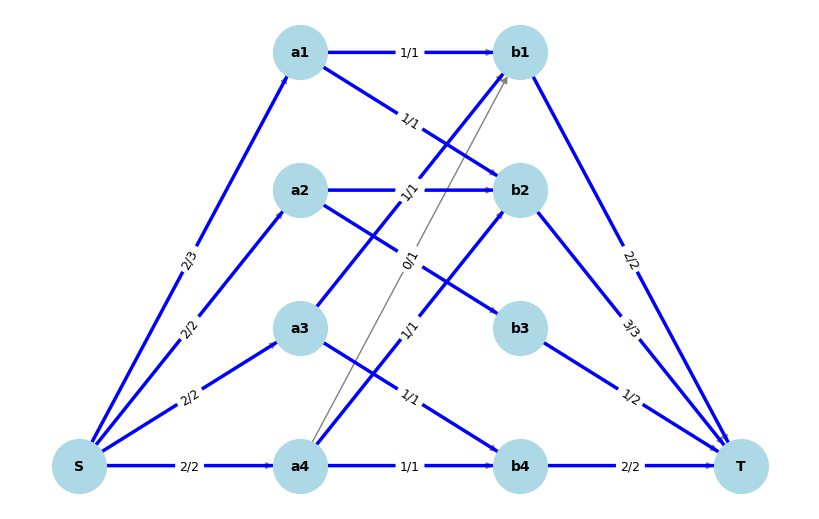

In [12]:

# Part (c): Different Demands Setup

# Adjust capacities from source to people according to demands
person_demands = {'a1': 3, 'a2': 2, 'a3': 2, 'a4': 2}

for person, demand in person_demands.items():
    G.add_edge(source, person, capacity=demand)

# Compute flow
flow_c, flow_dict_c = nx.maximum_flow(G, source, sink)
edge_labels_c = {(u, v): f"{flow_dict_c.get(u, {}).get(v, 0)}/{cap['capacity']}" 
                    for u, v, cap in G.edges(data=True)}

# Visualize part (c)
draw_bipartite_graph(G, source, sink, flow_dict_c, "Part_(c)_Different_Demands_for_Portions")

